<a href="https://colab.research.google.com/github/sush0677/Kaggle_Competation/blob/main/Flight_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('Clean_Dataset.csv')

df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.airline.value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [ ]:
df.source_city.value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


In [ ]:
df.destination_city.value_counts()

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


In [ ]:
df.stops.value_counts()

,count
stops,
one,250863
zero,36004
two_or_more,13286


In [ ]:
df['class'].value_counts()

,count
class,
Economy,206666
Business,93487


In [ ]:
df['duration'].value_counts()

,count
duration,
2.17,4242
2.25,4036
2.75,2879
2.08,2755
2.83,2323
...,...
37.17,1
38.75,1
38.50,1


# Preprocessing

In [ ]:
df=df.drop('Unnamed: 0', axis=1)
df=df.drop('flight', axis=1)
df['class'] = df['class'].apply(lambda x: 0 if x == 'Economy' else 1)

In [ ]:
df.stops = pd.factorize(df.stops)[0]

In [ ]:
df = df.join(pd.get_dummies(df.airline, prefix='airline').astype(int)).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source').astype(int)).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='dest').astype(int)).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival').astype(int)).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='depature').astype(int)).drop('departure_time', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

x,y = df.drop('price', axis=1), df.price

In [ ]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,depature_Afternoon,depature_Early_Morning,depature_Evening,depature_Late_Night,depature_Morning,depature_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
reg = RandomForestRegressor(n_jobs=10, random_state=42)
reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=10, random_state=42)

In [ ]:
reg.score(X_test, y_test)

0.984919940343326

In [ ]:
import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
y_pred = reg.predict(X_test)
print('R2', r2_score(y_test, y_pred))
print('RMSE', math.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE', mean_absolute_error(y_test, y_pred))
print('MAPE', mean_absolute_percentage_error(y_test, y_pred))

R2 0.984919940343326
RMSE 2788.1003277099962
MAE 1077.61092585048
MAPE 0.0694001950694939


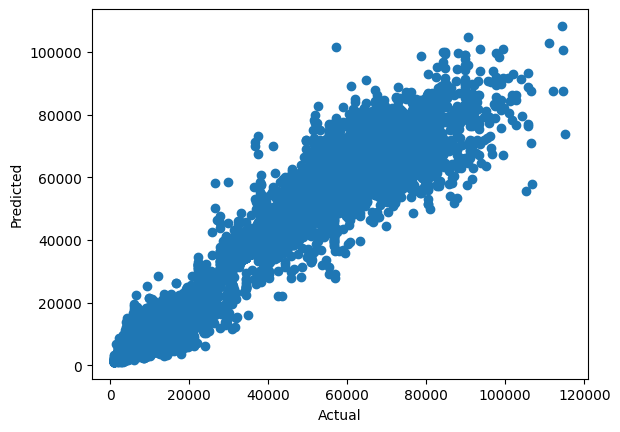

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
df.price.describe()

,price
count,300153.000000
mean,20889.660523
std,22697.767366
min,1105.000000
25%,4783.000000
50%,7425.000000
75%,42521.000000
max,123071.000000


In [ ]:
importances = dict(zip(x.columns, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)
sorted_importances

[('class', 0.879856085728768),
 ('duration', 0.05780011231494377),
 ('days_left', 0.01850843887109693),
 ('airline_Air_India', 0.005508482148514097),
 ('airline_Vistara', 0.004453169651076212),
 ('source_Delhi', 0.003798313906599006),
 ('dest_Delhi', 0.0034620170682012432),
 ('source_Mumbai', 0.002285610845998008),
 ('stops', 0.0019043260197838291),
 ('dest_Mumbai', 0.0018751146178251166),
 ('dest_Kolkata', 0.0017911242710969201),
 ('source_Kolkata', 0.0016834602506654067),
 ('arrival_Evening', 0.0015294406422974454),
 ('dest_Hyderabad', 0.00150942690385305),
 ('dest_Bangalore', 0.0012759782008839842),
 ('source_Hyderabad', 0.0012380571813863153),
 ('arrival_Night', 0.0011229853367618237),
 ('source_Bangalore', 0.0011174979493346732),
 ('depature_Evening', 0.001094705052884003),
 ('arrival_Afternoon', 0.0009676064124959665),
 ('source_Chennai', 0.0008603277349056547),
 ('depature_Morning', 0.0008575861950303981),
 ('dest_Chennai', 0.0008171748310833117),
 ('depature_Afternoon', 0.00079

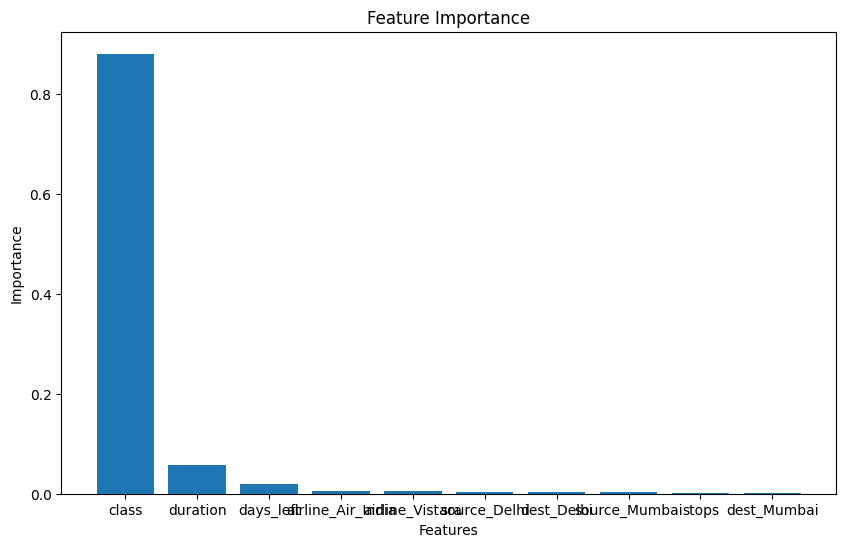

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar([x[0] for x in sorted_importances[0:10]], [x[1] for x in sorted_importances[:10]])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

reg = RandomForestRegressor(n_jobs=1)

param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

best_params = grid_search.best_params

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100,200,300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2,11),
    'min_samples_leaf': randint(1,5),
    'max_features': ['auto', 'sqrt', 'log2']
}

reg = RandomForestRegressor(n_jobs=1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=100, cv=3, scoring='neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-1)

random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator

random_search

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
best_regressor.score(X_test, y_test)